<a href="https://colab.research.google.com/github/enessibest/Logistics-Regression-/blob/main/Logistics_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Section I : Data Loading
- Part I : Load the dataset into the notebook
- Part II : Explore and make note of Attribute Information from UCI
- Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?
-
Part IV : What is the ratio of the two classes ? Are they balanced ?

In [2]:
data = pd.read_csv("/content/portu_banking_final.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
data.shape

(41188, 21)

In [5]:
#attribute of data
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [6]:
data.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
#Part III : What is the significance of the y column in the dataset 
#and what are the value counts of the y column?
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


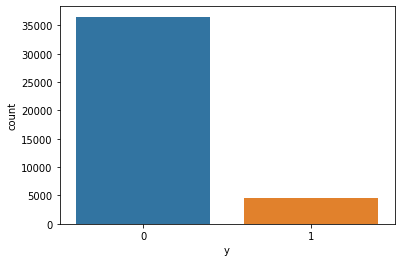

In [8]:
#Part IV : What is the ratio of the two classes ? Are they balanced ?

sns.countplot(data['y'])

# y features is not balance 

# SECTION 2: DATA CLEANING 

In [9]:
#Part 1

data.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [10]:
#part 2
data.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [11]:
data['age']= data['age'].replace(['35-30'],33)
data['age']= data['age'].replace(['30-35'],33)
data['age']= data['age'].replace(['25-30'],28)
data['age']= data['age'].replace(['18-25'],22)
data['age']= data['age'].replace(['30-32'],31)
data['age']= data['age'].replace(['50-55'],53)
data['age']= data['age'].replace(['45-50'],48)
data['age']= data['age'].replace(['20-25'],23)
data['age']= data['age'].replace(['20-40'],30)
data['age']= data['age'].replace(['35-40'],38)
data['age']= data['age'].replace(['30-40'],35)

In [12]:
data.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', 33, '25', '57', '63', '58', '60', '64', '51', '23', '20',
       '74', '80', '61', 28, '62', '75', '21', '82', '77', 22, 31, '70',
       53, '76', '73', '66', '22', '71', '19', '79', '88', '65', '67',
       '81', '18', '84', '69', '98', '85', '83', '78', '92', 48, 23, 30,
       38, '86', '94', '17', '91', '89', '87', '95', 35, 56, 39, 37, 45,
       24, 50, 58, 27, 32, 51, 41, 49, 43, 44, 29, 26, 57, 25, 42, 46, 67,
       34, 54, 40, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21,
       88, 18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81,
       64, 77, 74, 85, 82], dtype=object)

In [13]:
#converting the age to numeric data type
data.age = data.age.apply(pd.to_numeric)

In [14]:
data.age.dtypes

dtype('int64')

In [15]:
data.job

0        blue-collar
1         technician
2         management
3           services
4            retired
            ...     
41183        retired
41184      housemaid
41185         admin.
41186     technician
41187        student
Name: job, Length: 41188, dtype: object

In [17]:
#checking for missing values
missing_values= data.isna().sum() 
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [18]:
#to determind the mode (frequency)
data.job.value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
BLUE-COLLAR          1
UNKNOWN              1
HOUSEMAID            1
TECHNICIAN           1
Name: job, dtype: int64

In [16]:
data.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

In [21]:
data['job']= data['job'].replace('MANAGEMENT', 'management')
data['job']= data['job'].replace('SERVICES', 'services')
data['job']= data['job'].replace('RETIRED', 'retired')
data['job']= data['job'].replace('ADMIN.', 'admin.')
data['job']= data['job'].replace('TECHNICIAN', 'technician')
data['job']= data['job'].replace('BLUE-COLLAR', 'blue-collar')
data['job']= data['job'].replace('HOUSEMAID', 'housemaid')
data['job']= data['job'].replace('UNKNOWN', 'admin.')
data['job']= data['job'].replace('unknown', 'admin.')
data['job']= data['job'].replace('STUDENT', 'student')

In [22]:
data.job.value_counts()

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [23]:
#checking for marital 
data.marital.value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [24]:
data['marital']=data['marital'].replace('M','married')
data['marital']=data['marital'].replace('D','divorced')
data['marital']=data['marital'].replace('S','single')
data['marital']=data['marital'].replace('unknown','married')

In [25]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [26]:
data['education']=data['education'].replace('basic-4y','basic.4y')
data['education']=data['education'].replace('basic-6y','basic.6y')
data['education']=data['education'].replace('basic-9y','basic.9y')
data['education']=data['education'].replace('unknown','university.degree')

In [27]:
data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [28]:
data['default']=data['default'].replace('unknown','no')

In [29]:
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [30]:
data['housing']=data['housing'].replace('unknown','yes')

In [31]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [32]:
data['loan']=data['loan'].replace('unknown','no')

In [33]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,no,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [34]:
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [35]:
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [36]:
data.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [37]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,no,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [38]:
data.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [39]:
data= data.drop(['poutcome'], axis= 1)

In [40]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,no,yes,no,cellular,aug,thu,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1


#Performing EDA

In [41]:
data[['job','y']].groupby('job').mean()

,y
job,
admin.,0.129185
blue-collar,0.068943
entrepreneur,0.085165
housemaid,0.100000
management,0.112175
retired,0.252326
self-employed,0.104856
services,0.081381
student,0.314286


In [42]:
data[['marital','y']].groupby('marital').mean()

,y
marital,
divorced,0.103209
married,0.101727
single,0.140041


In [43]:
data[['education','y']].groupby('education').mean()

,y
education,
basic.4y,0.102490
basic.6y,0.082024
basic.9y,0.078246
high.school,0.108355
illiterate,0.222222
professional.course,0.113485
university.degree,0.138211


#section 3b

In [53]:
#creating bar graph

plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

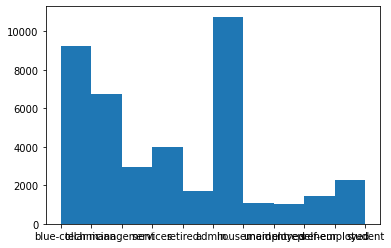

In [54]:
plt.hist(data['job'])
plt.show()

(array([25008.,     0.,     0.,     0.,     0., 11568.,     0.,     0.,
            0.,  4612.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

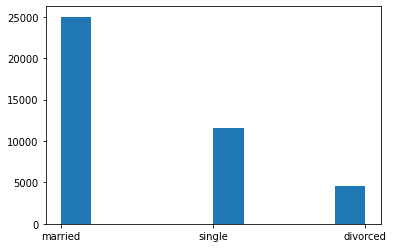

In [55]:
plt.hist(data['marital'])


(array([1.6660e+03, 1.1344e+04, 1.2036e+04, 8.0880e+03, 5.8220e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <a list of 10 Patch objects>)

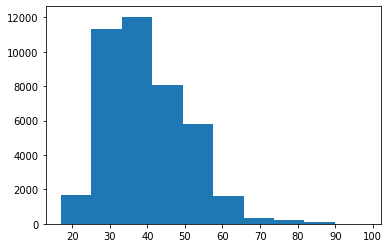

In [56]:
plt.hist(data['age'])

In [57]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [58]:

data_bar = [ 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

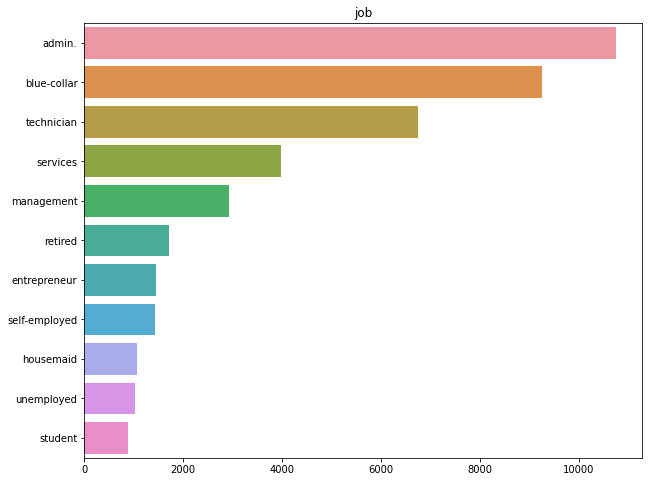

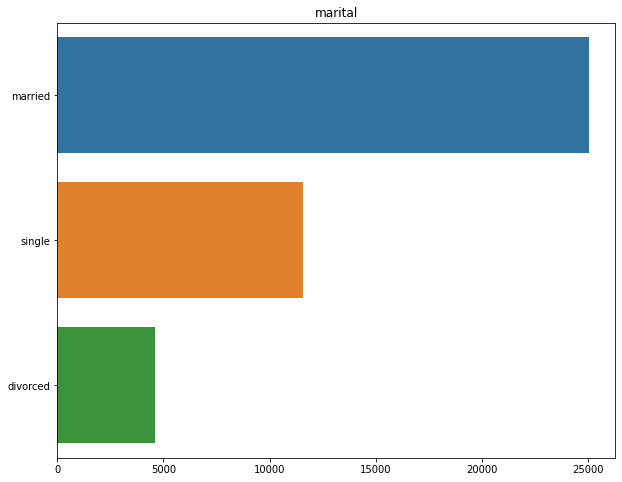

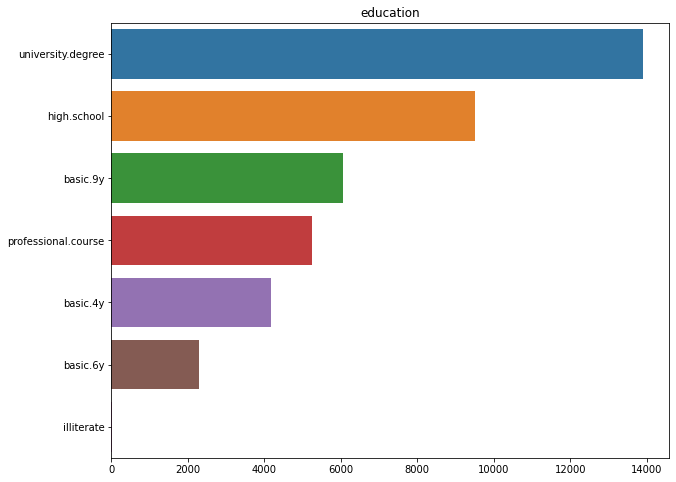

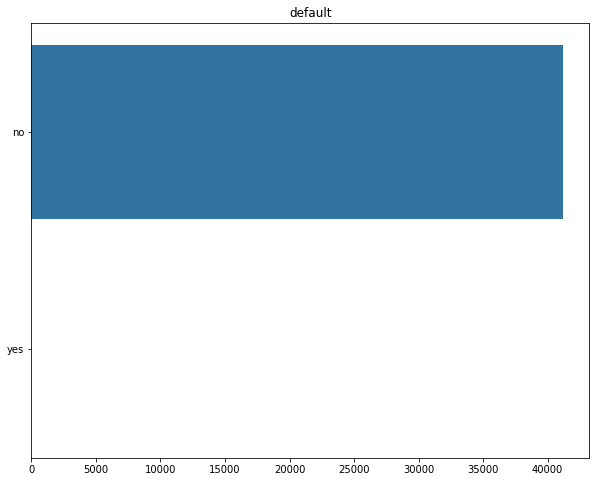

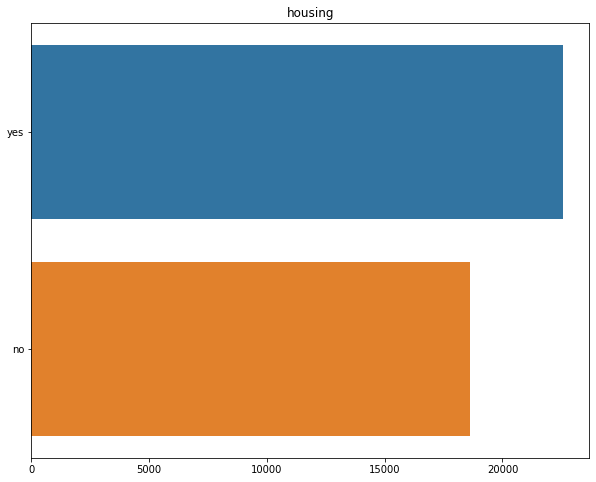

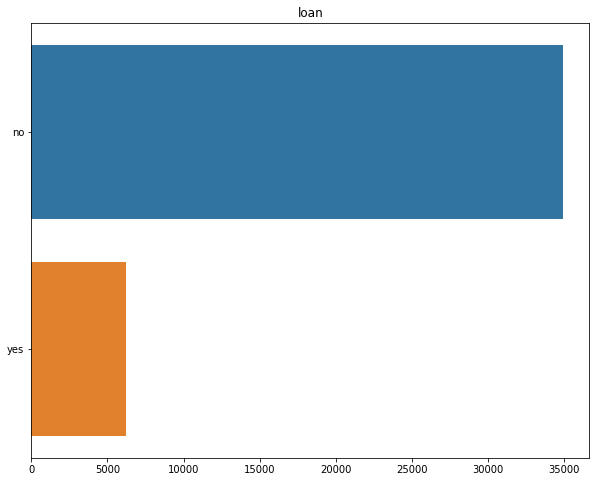

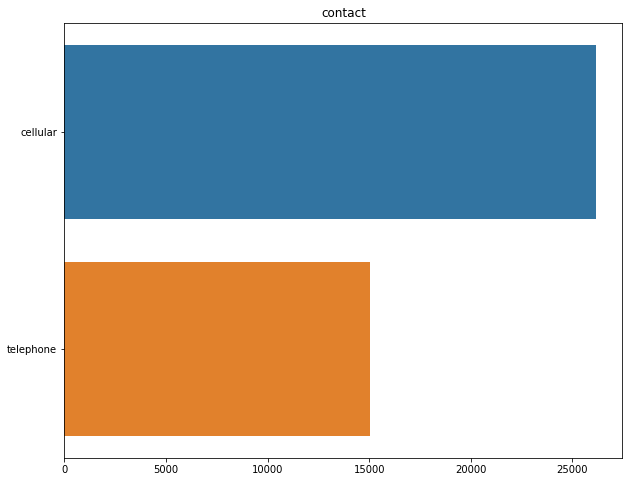

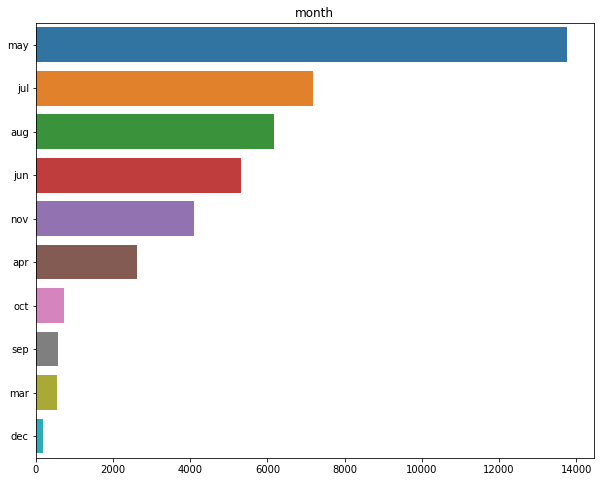

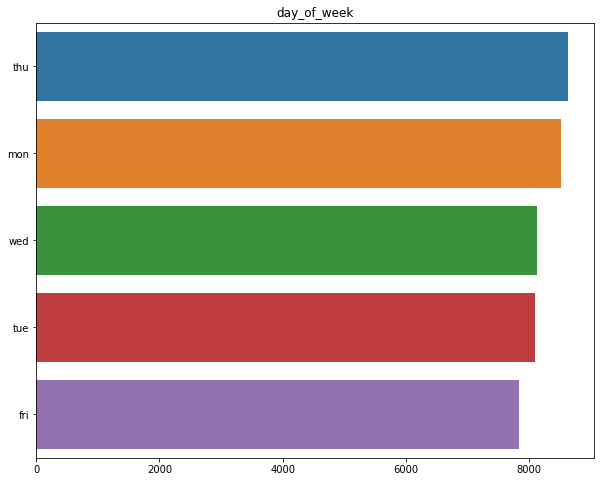

In [60]:
for cols in data_bar:
  plt.figure(figsize=(10, 8))
  sns.barplot(data[cols].value_counts().values,data[cols].value_counts().index)
  plt.title(cols)
plt.show()

In [62]:
#section 4
df =pd.get_dummies(data,columns=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week'])

In [64]:
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


#Section 5

In [65]:
X = df.drop(['y'],axis=1)

In [66]:
Y = df['y']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [70]:
#splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.25)

In [73]:
#training and testing the model
model=LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
logistic_score = model.score(X_test, Y_test)
print('accuracy', logistic_score)
print(classification_report(Y_test, Y_pred))

accuracy 0.9094882004467321
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      9141
           1       0.66      0.40      0.50      1156

    accuracy                           0.91     10297
   macro avg       0.79      0.69      0.72     10297
weighted avg       0.90      0.91      0.90     10297



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
